# ORIGINAL file name

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network
import json
import os
from scipy import stats
import pandas as pd
import numpy as np

In [ ]:
file_name = 'Data_num.csv'

In [ ]:
pip install DataSynthesizer

In [ ]:
pip install sdv

# SDV


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
real_data = pd.read_csv(file_name)
real_data

,Disability,Age,Gender,Barriers,Frequency,VALUE
0,Pain,15_to_24,Men,Interaction_family,Never,44910
1,Pain,15_to_24,Men,Interaction_family,Sometimes,26140
2,Pain,15_to_24,Men,Interaction_family,Often,352247
3,Pain,15_to_24,Men,Interaction_family,Always,352247
4,Pain,15_to_24,Men,Interaction_healthcare,Never,50670
...,...,...,...,...,...,...
787,Unknown,65_and_over,Women,Interaction_healthcare,Always,352247
788,Unknown,65_and_over,Women,Interaction_services,Never,352247
789,Unknown,65_and_over,Women,Interaction_services,Sometimes,352247
790,Unknown,65_and_over,Women,Interaction_services,Often,352247


In [ ]:
real_data = pd.read_csv(file_name)
disability_mapping = {
    'Pain': 0,
    'Flexibility': 1,
    'Mobility': 2,
    'MentalHealth': 3,
    'Seeing': 4,
    'Hearing': 5,
    'Dexterity': 6,
    'Learning': 7,
    'Memory': 8,
    'Developmental': 9,
    'Unknown': 10
}

age_mapping = {
    '15_to_24': 0,
    '25_to_64': 1,
    '65_and_over': 2
}

gender_mapping = {
    'Men': 0,
    'Women': 1
}

barriers_mapping = {
    'Interaction_family': 0,
    'Interaction_healthcare': 1,
    'Interaction_services': 2
}

frequency_mapping = {
    'Never': 0,
    'Sometimes': 1,
    'Often': 2,
    'Always': 3
}

real_data['Disability'] = real_data['Disability'].map(disability_mapping)
real_data['Age'] = real_data['Age'].map(age_mapping)
real_data['Gender'] = real_data['Gender'].map(gender_mapping)
real_data['Barriers'] = real_data['Barriers'].map(barriers_mapping)
real_data['Frequency'] = real_data['Frequency'].map(frequency_mapping)


In [ ]:
metadata = SingleTableMetadata()
metadata.detect_from_csv(filepath=file_name)
metadata.validate()

In [ ]:
metadata

## GaussianCopulaSynthesizer

In [ ]:
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)
synthetic_data = synthesizer.sample(num_rows=500)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthetic_data.head()

,Disability,Age,Gender,Barriers,Frequency,VALUE
0,8,1,1,0,0,187392
1,4,0,0,1,0,641938
2,4,1,0,1,1,85779
3,1,0,0,2,1,193962
4,6,0,0,1,0,19539


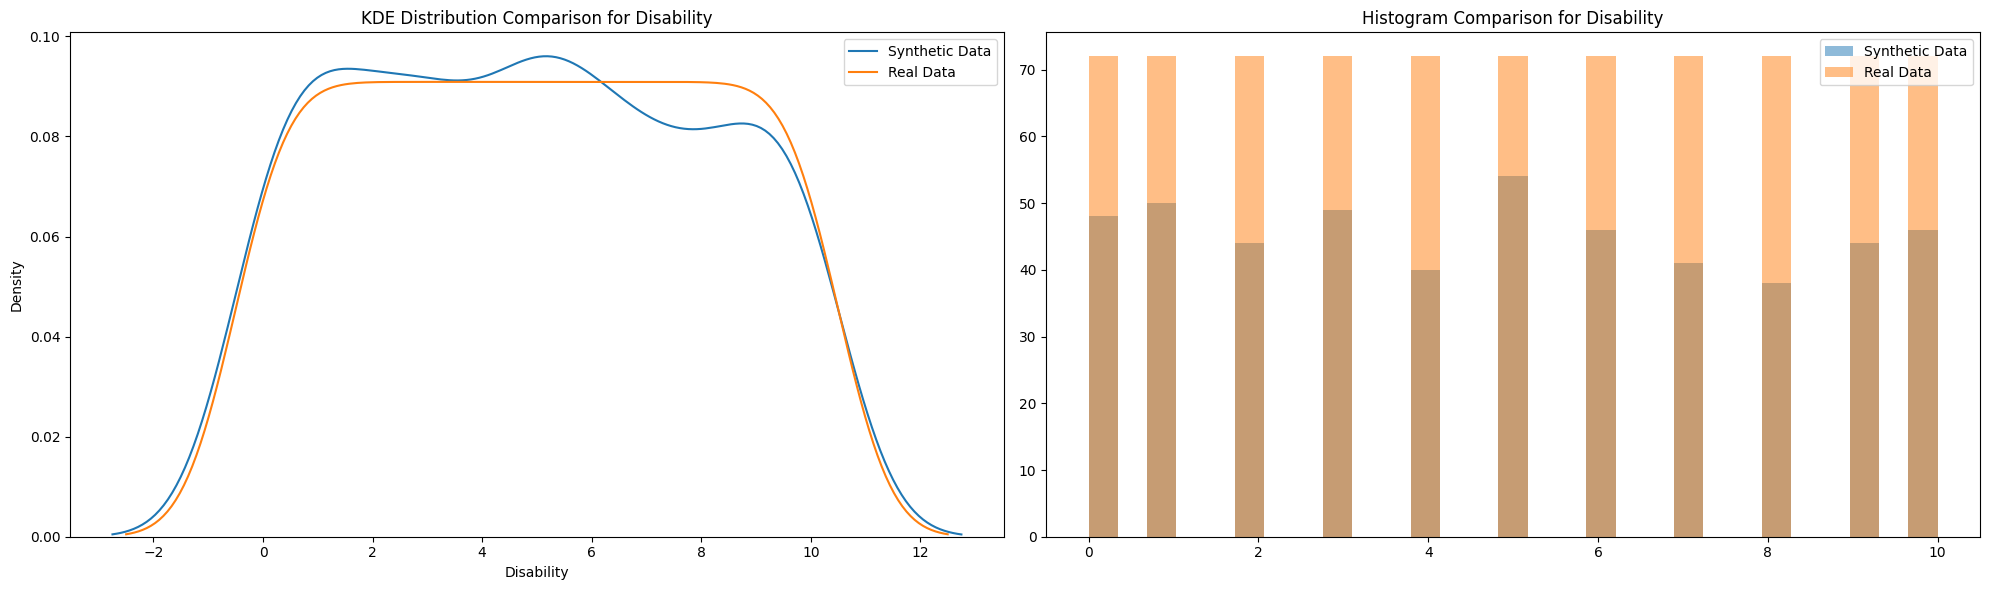

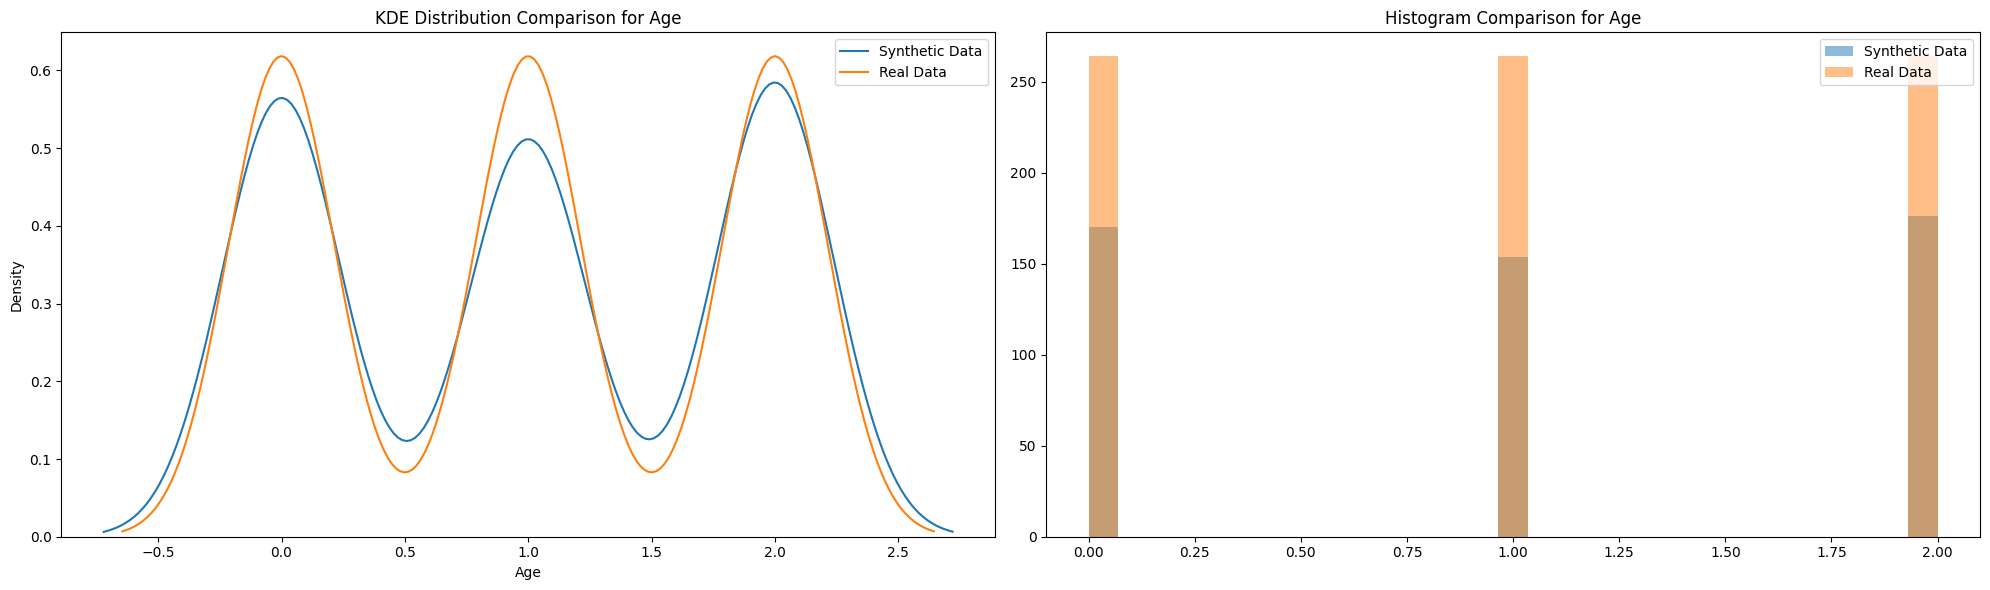

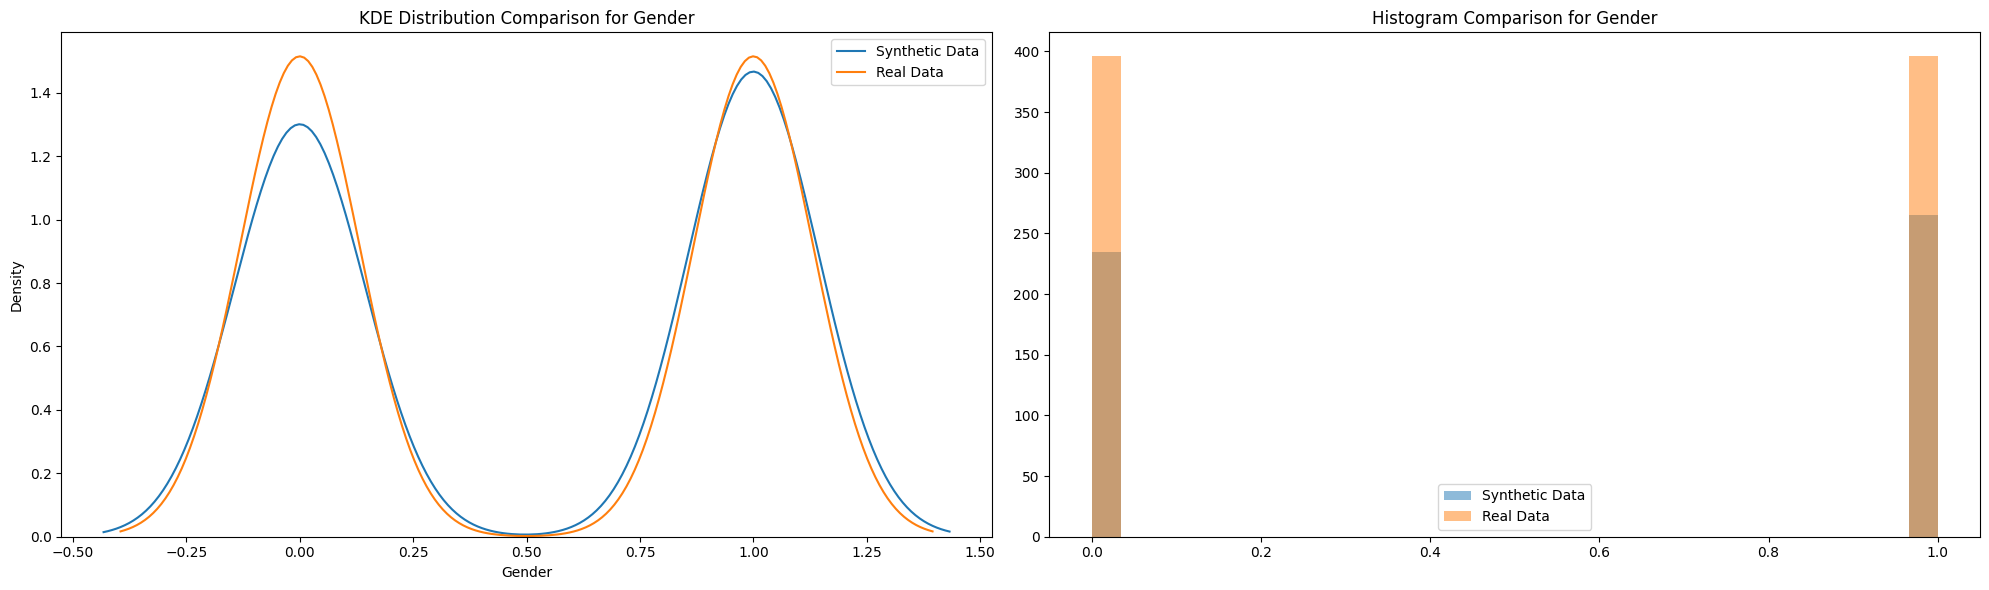

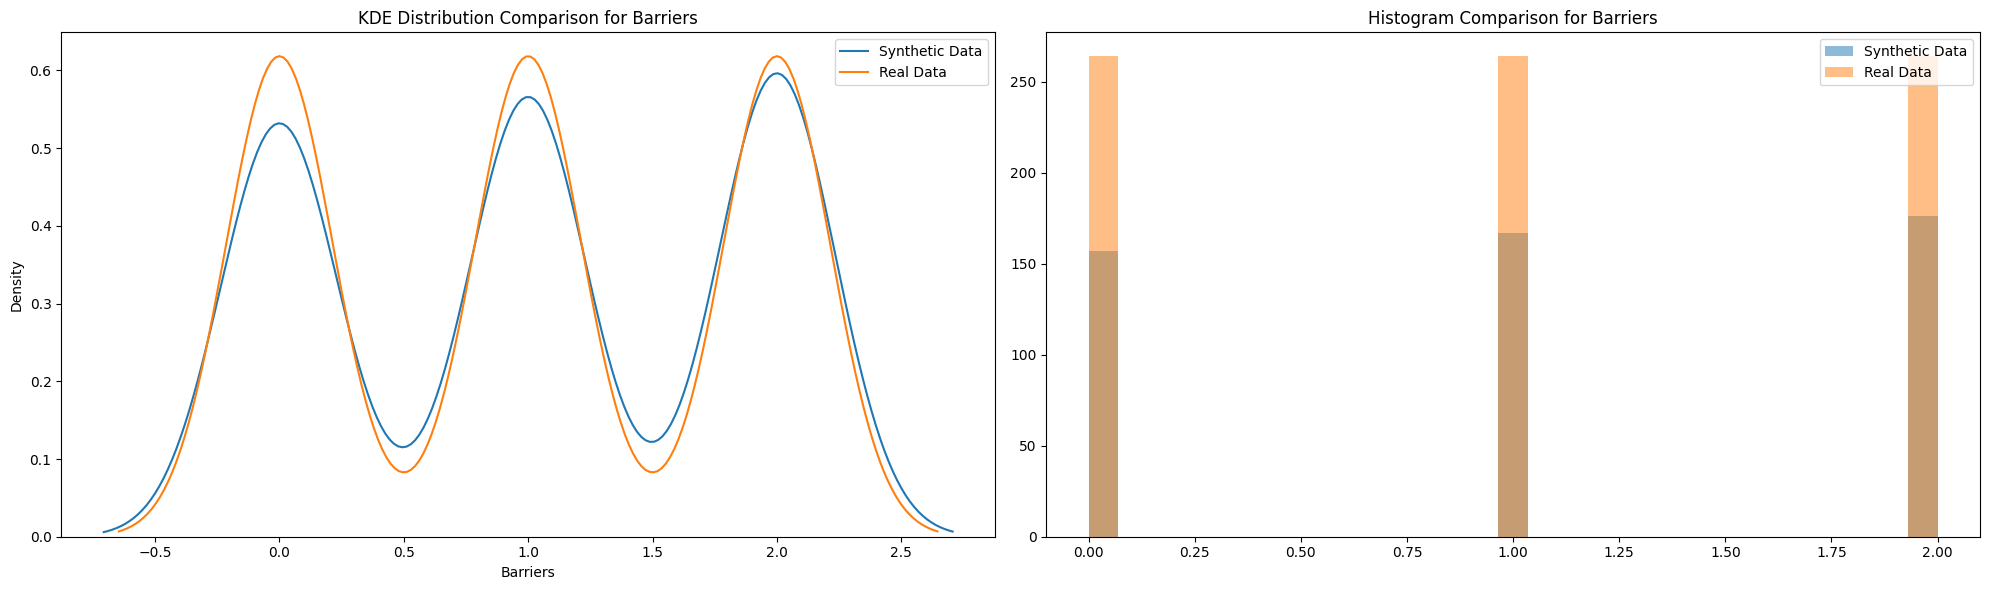

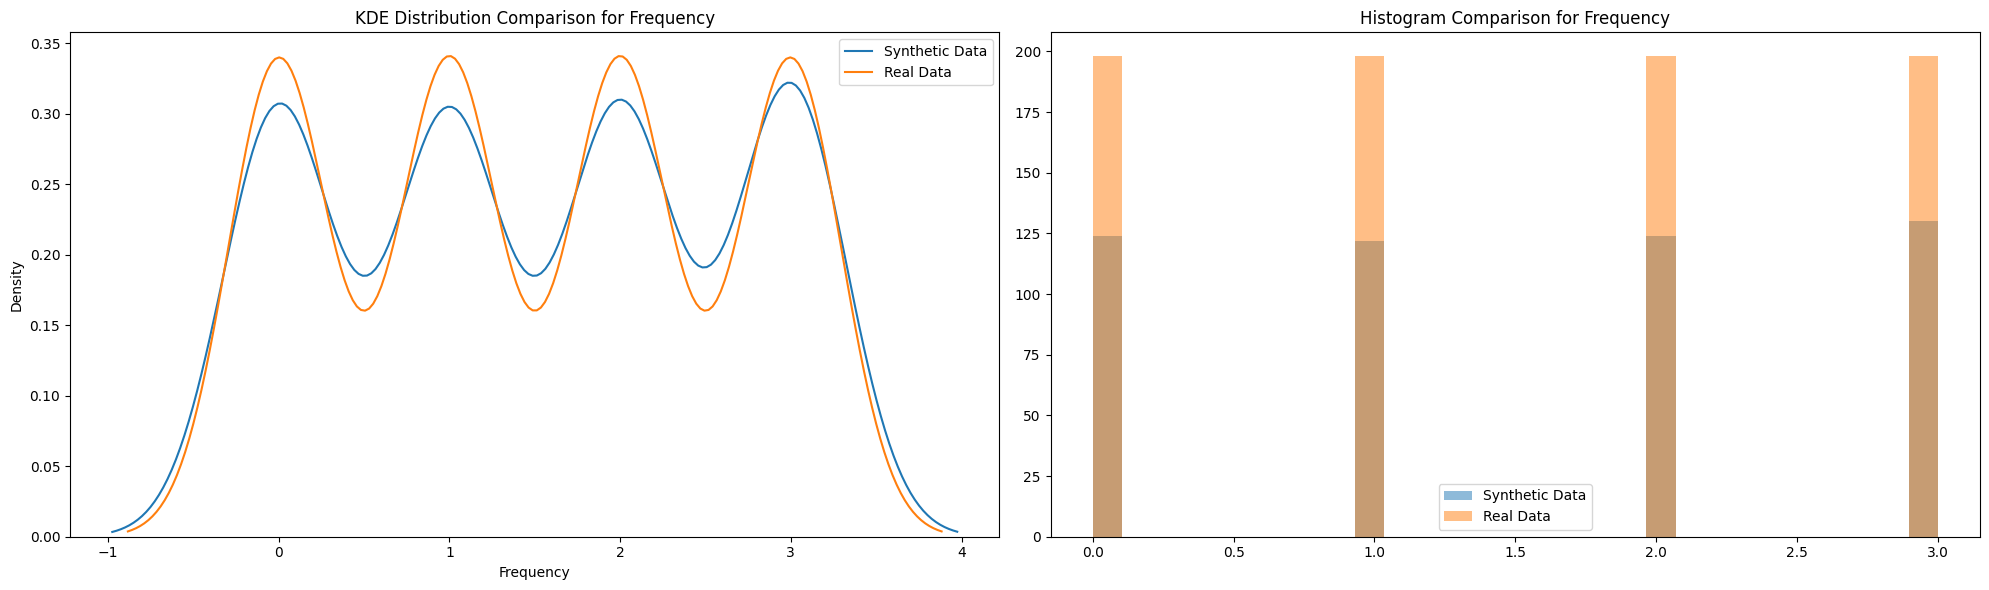

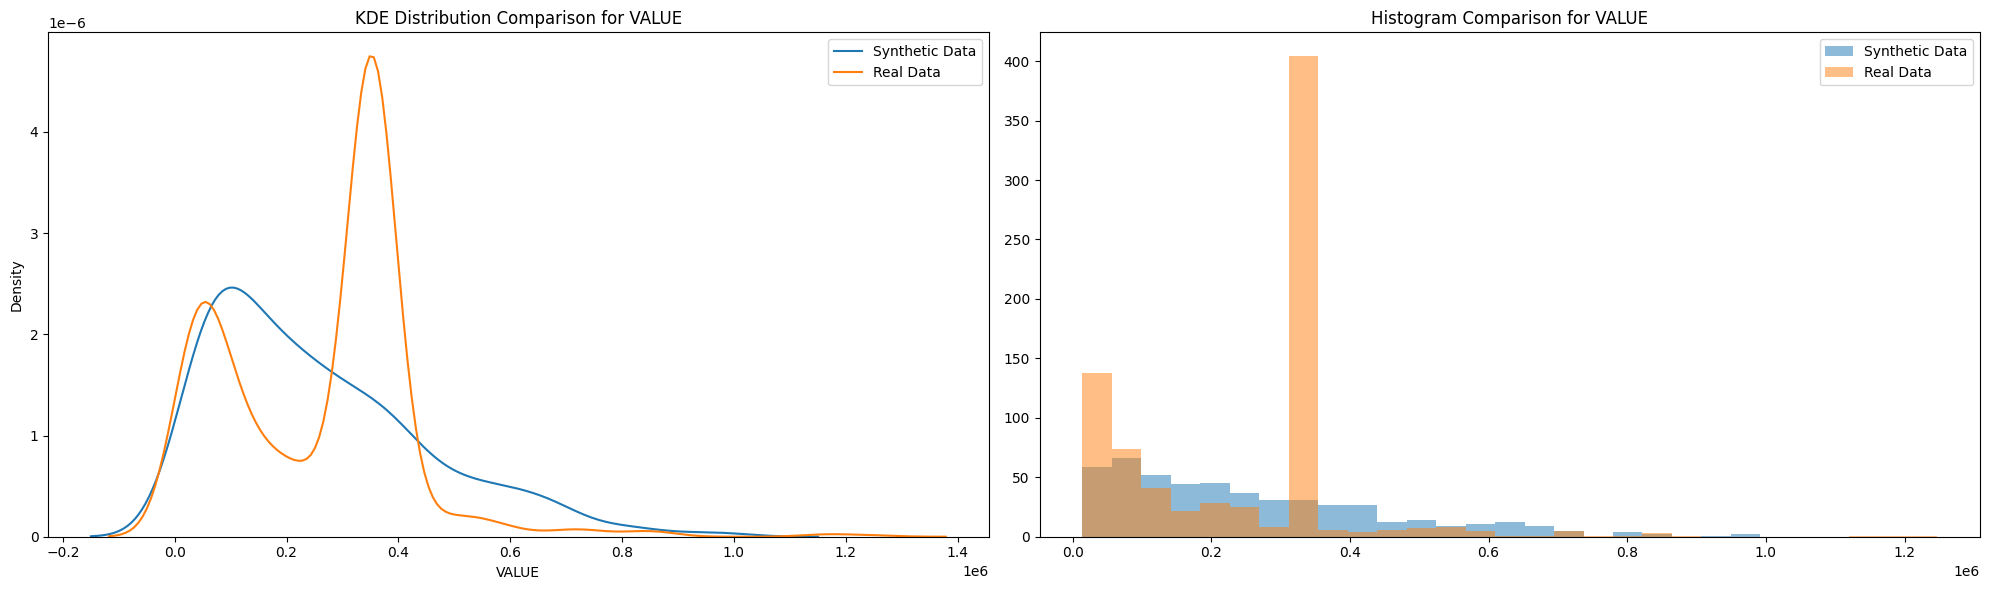

In [ ]:
for column in real_data.columns:
    if real_data[column].dtype in ['int64', 'float64']:
        synthetic_data_filtered = synthetic_data[column]
        real_data_filtered = real_data[column]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

        # KDE Plot
        sns.kdeplot(synthetic_data_filtered, label='Synthetic Data', ax=ax1)
        sns.kdeplot(real_data_filtered, label='Real Data', ax=ax1)
        ax1.set_title(f"KDE Distribution Comparison for {column}")
        ax1.legend()

        # Bar Plot
        bins = np.linspace(min(min(synthetic_data_filtered), min(real_data_filtered)),
                            max(max(synthetic_data_filtered), max(real_data_filtered)),
                            30)

        ax2.hist(synthetic_data_filtered, bins=bins, alpha=0.5, label='Synthetic Data')
        ax2.hist(real_data_filtered, bins=bins, alpha=0.5, label='Real Data')
        ax2.set_title(f"Histogram Comparison for {column}")
        ax2.legend()

        plt.tight_layout()
        plt.show()

In [ ]:
synthetic_data.to_csv('synthetic_data_coupula.csv', index=False)

## CTGANSynthesizer

In [ ]:
synthesizer2 = CTGANSynthesizer(metadata)
synthesizer2.fit(real_data)
synthetic_data2 = synthesizer2.sample(num_rows=500)

In [ ]:
synthetic_data2.to_csv('synthetic_data_CTGANSynthesizer.csv', index=False)

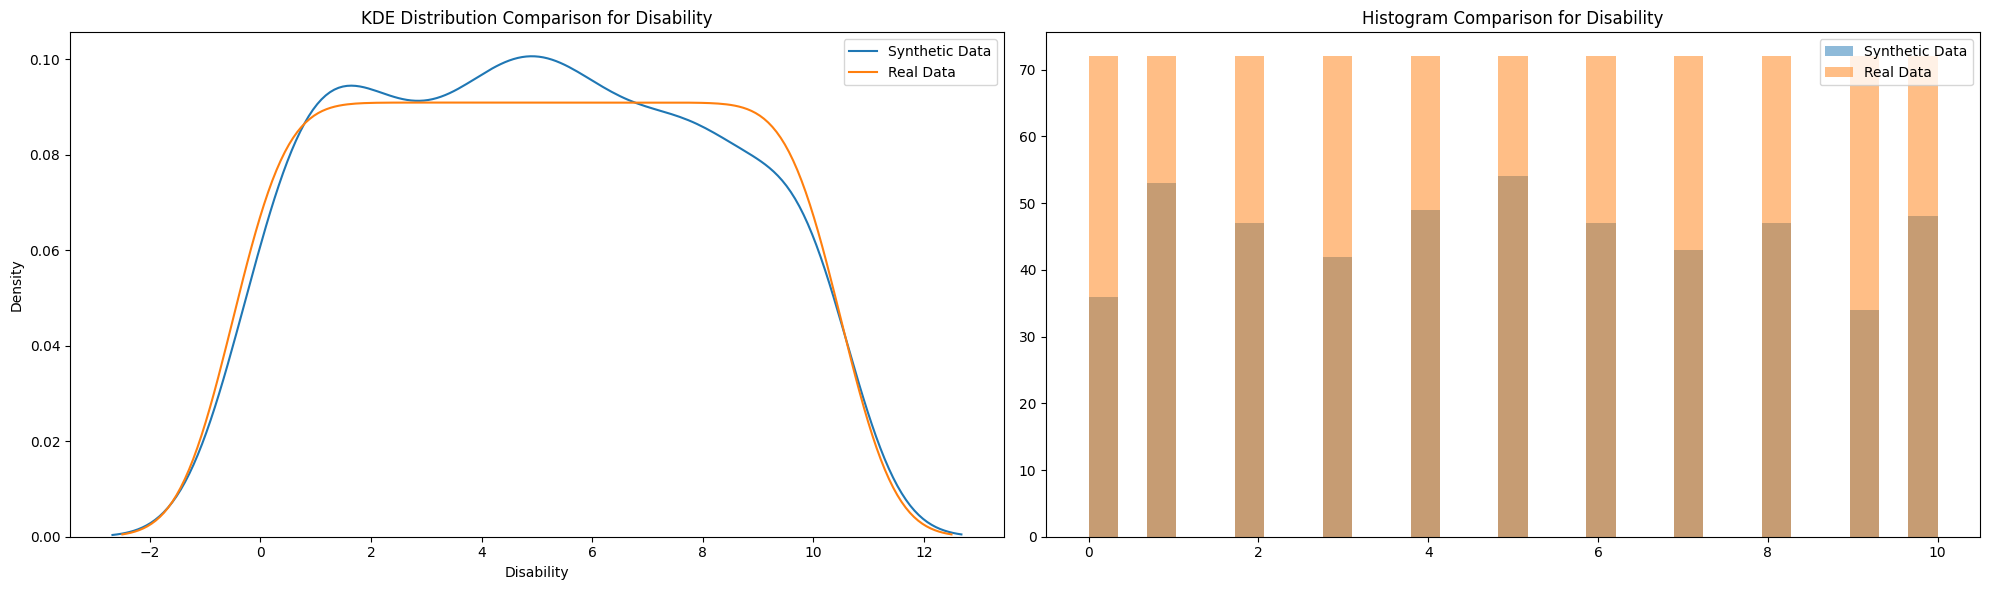

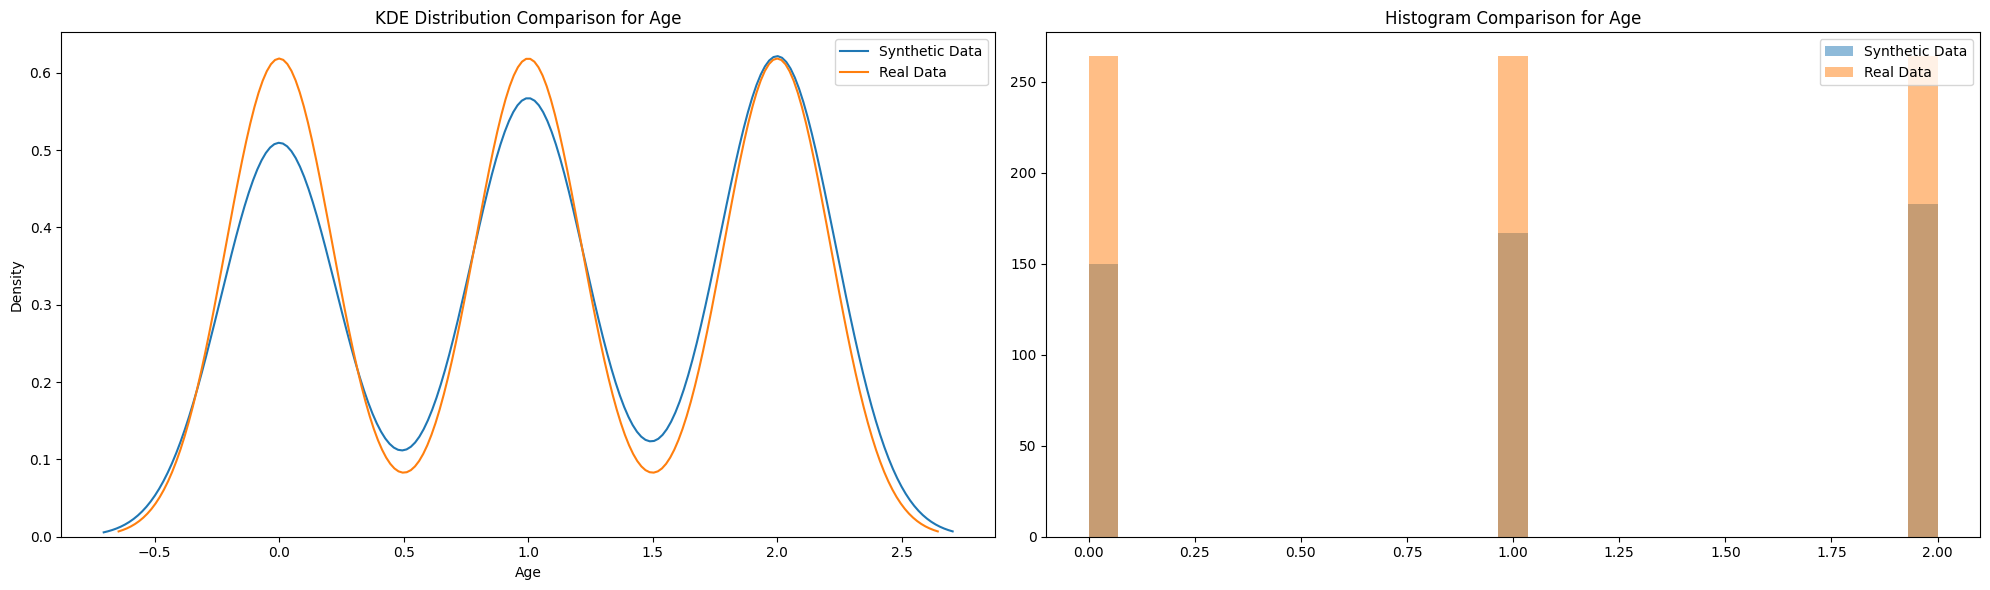

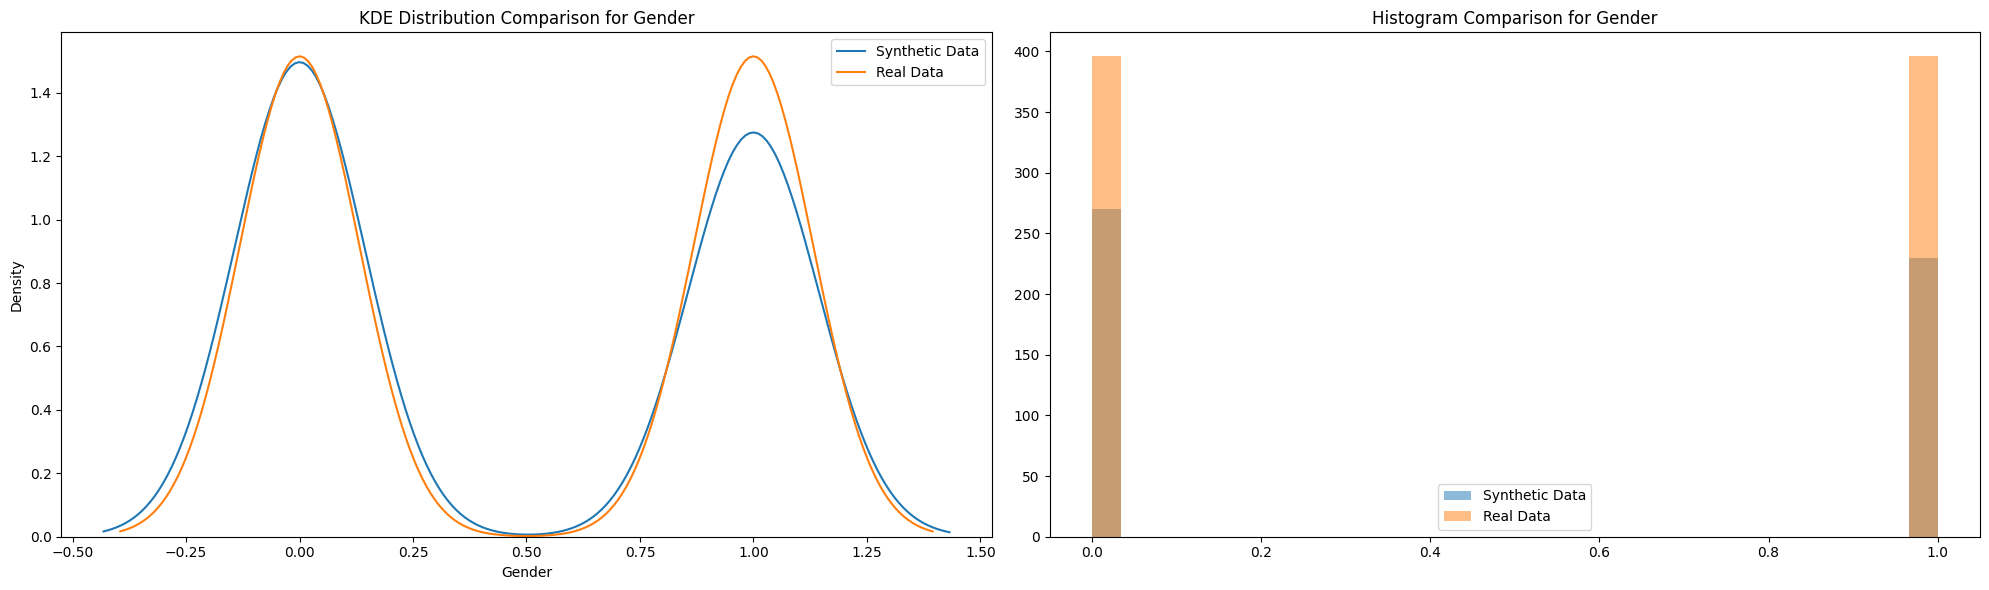

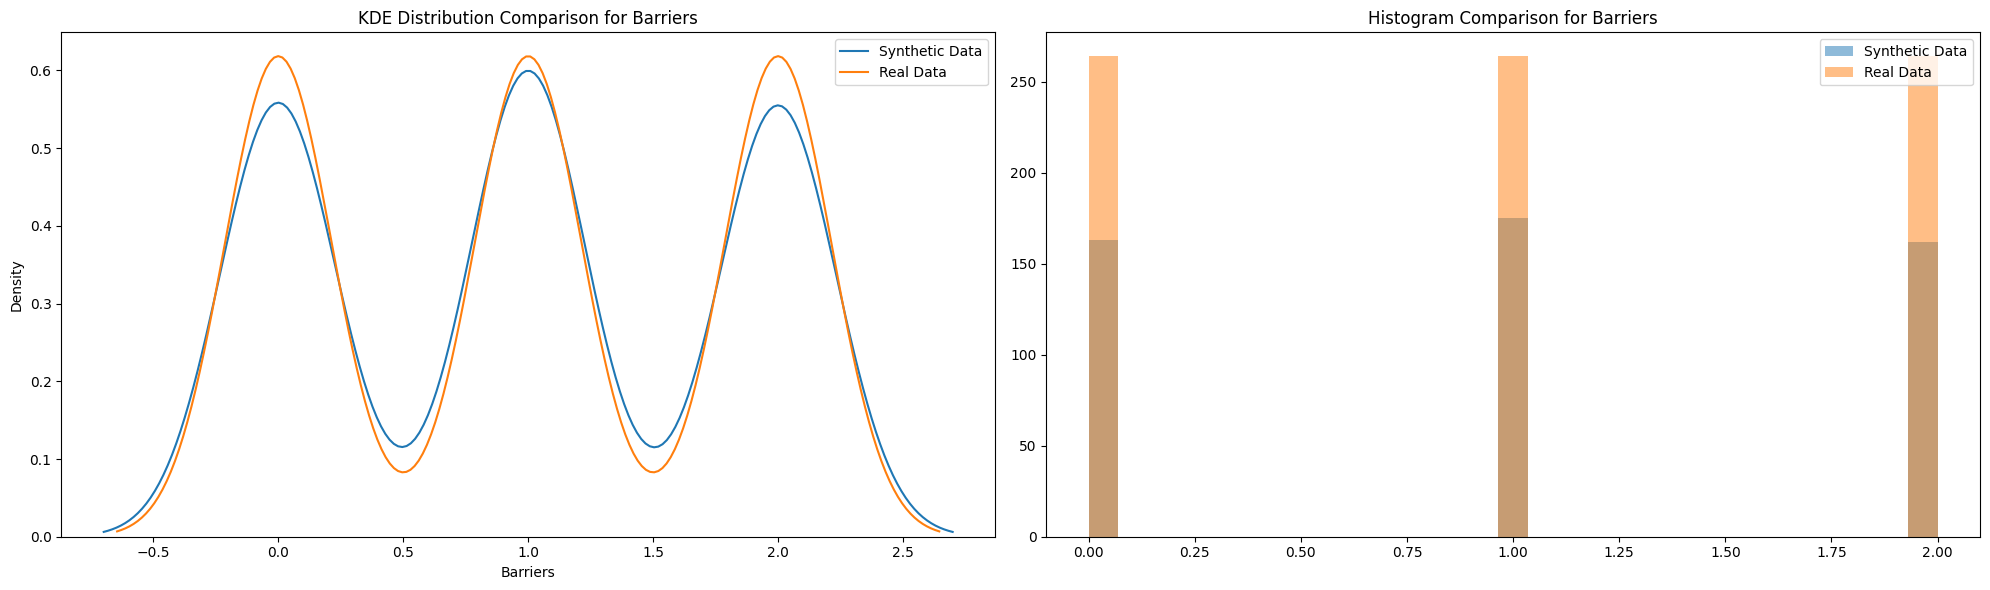

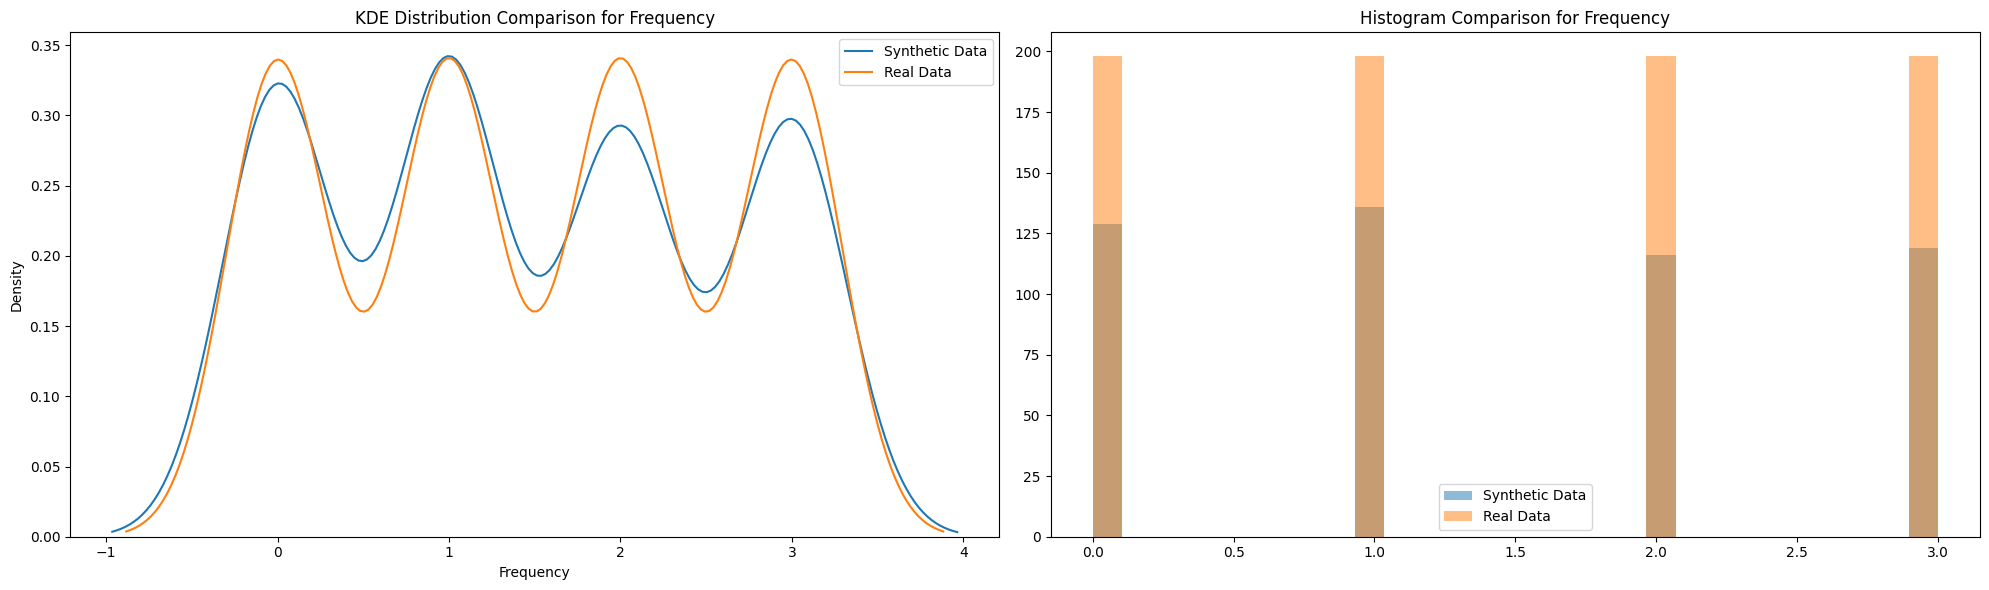

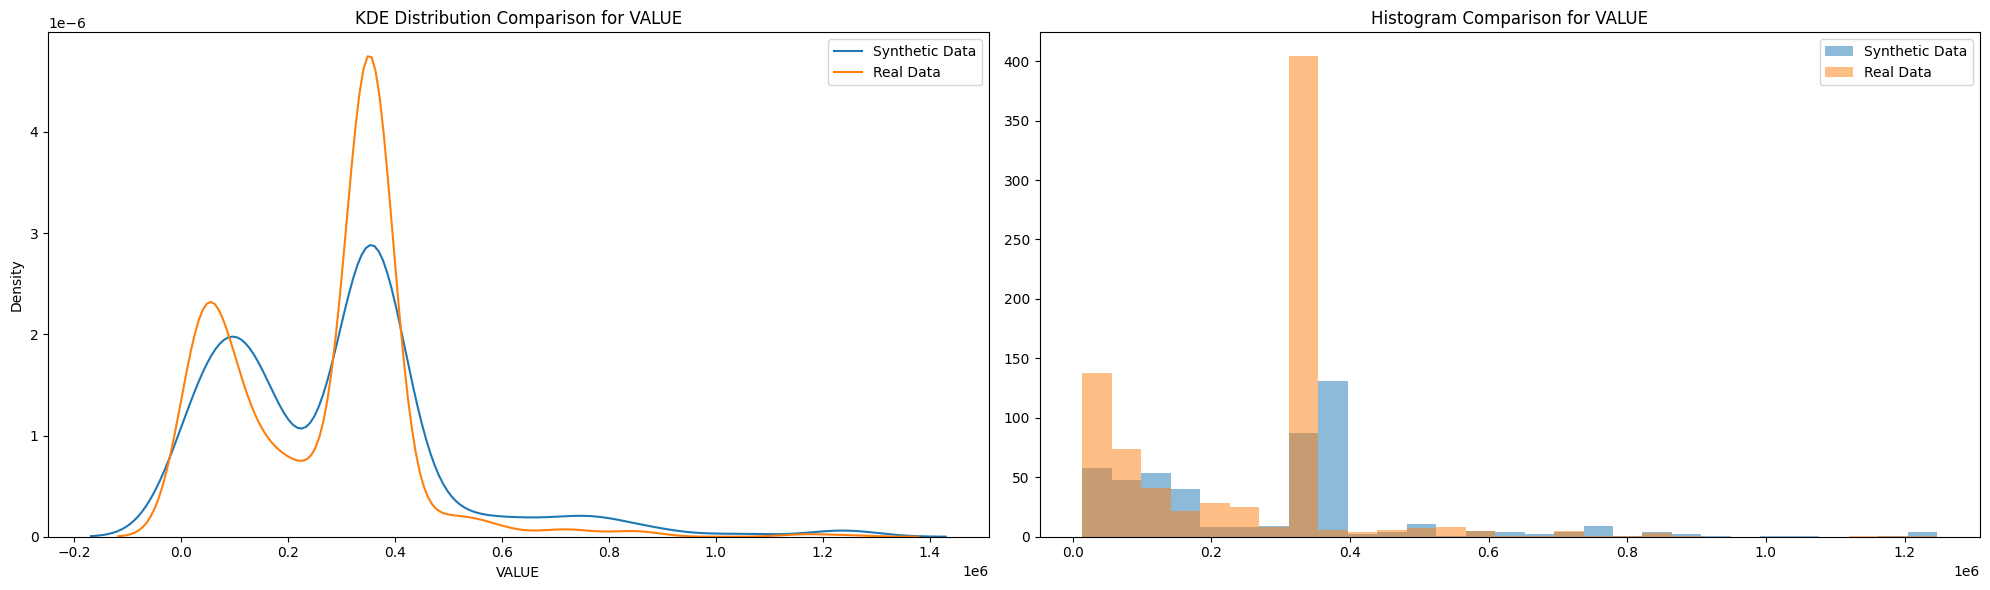

In [ ]:
for column in real_data.columns:
  if real_data[column].dtype in ['int64', 'float64']:
    synthetic_data_filtered = synthetic_data2[column]
    real_data_filtered = real_data[column]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # KDE Plot
    sns.kdeplot(synthetic_data_filtered, label='Synthetic Data', ax=ax1)
    sns.kdeplot(real_data_filtered, label='Real Data', ax=ax1)
    ax1.set_title(f"KDE Distribution Comparison for {column}")
    ax1.legend()

    # Bar Plot
    bins = np.linspace(min(min(synthetic_data_filtered), min(real_data_filtered)),
                        max(max(synthetic_data_filtered), max(real_data_filtered)),
                        30)

    ax2.hist(synthetic_data_filtered, bins=bins, alpha=0.5, label='Synthetic Data')
    ax2.hist(real_data_filtered, bins=bins, alpha=0.5, label='Real Data')
    ax2.set_title(f"Histogram Comparison for {column}")
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
diagnostic_report = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

quality_report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 6/6 [00:00<00:00, 582.58it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 90.60it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 530.42it/s]|
Column Shapes Score: 92.95%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 46.76it/s]|
Column Pair Trends Score: 82.02%

Overall Score (Average): 87.48%



In [ ]:
diagnostic_report = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data2,
    metadata=metadata)

quality_report = evaluate_quality(
    real_data=real_data,
    synthetic_data=synthetic_data2,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 6/6 [00:00<00:00, 668.15it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 105.64it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 477.50it/s]|
Column Shapes Score: 91.73%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 37.44it/s]|
Column Pair Trends Score: 89.18%

Overall Score (Average): 90.45%



# DataSynthesizer Usage (correlated attribute mode)

In [ ]:
real_data.to_csv('real_data_cat.csv', index=False)

In [ ]:
input_data = 'real_data_cat.csv'
mode = 'correlated_attribute_mode'

description_file_1 = f'./description_correlated_attribute_mode.json'
synthetic_data_1 = f'./sythetic_data_correlated_attribute_mode.csv'
os.makedirs(os.path.dirname(description_file_1), exist_ok=True)
os.makedirs(os.path.dirname(synthetic_data_1), exist_ok=True)

In [ ]:
input = pd.read_csv(input_data)
input.head()

,Disability,Age,Gender,Barriers,Frequency,VALUE
0,0,0,0,0,0,44910
1,0,0,0,0,1,26140
2,0,0,0,0,2,352247
3,0,0,0,0,3,352247
4,0,0,0,1,0,50670


In [ ]:
threshold_value = 20
categorical_attributes = {'Disability' : True, 'Age': True, 'Gender': True,'Barriers': True,'Frequency': True}
candidate_keys = {'ssn': True}
epsilon = 1
degree_of_bayesian_network = 2
num_tuples_to_generate = 1000 # Here 32561 is the same as input dataset, but it can be set to another number.

In [ ]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data,
                                                        epsilon=epsilon,
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file_1)

================ Constructing Bayesian Network (BN) ================
Adding ROOT Barriers
Adding attribute Gender
Adding attribute Frequency
Adding attribute VALUE
Adding attribute Disability
Adding attribute Age
========================== BN constructed ==========================


In [ ]:
display_bayesian_network(describer.bayesian_network)

generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file_1)
generator.save_synthetic_data(synthetic_data_1)

input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data_1)
attribute_description = read_json_file(description_file_1)['attribute_description']
inspector = ModelInspector(input_df, synthetic_df, attribute_description)

Constructed Bayesian network:
    Gender     has parents ['Barriers'].
    Frequency  has parents ['Gender', 'Barriers'].
    VALUE      has parents ['Frequency', 'Barriers'].
    Disability has parents ['VALUE', 'Frequency'].
    Age        has parents ['Frequency', 'Gender'].


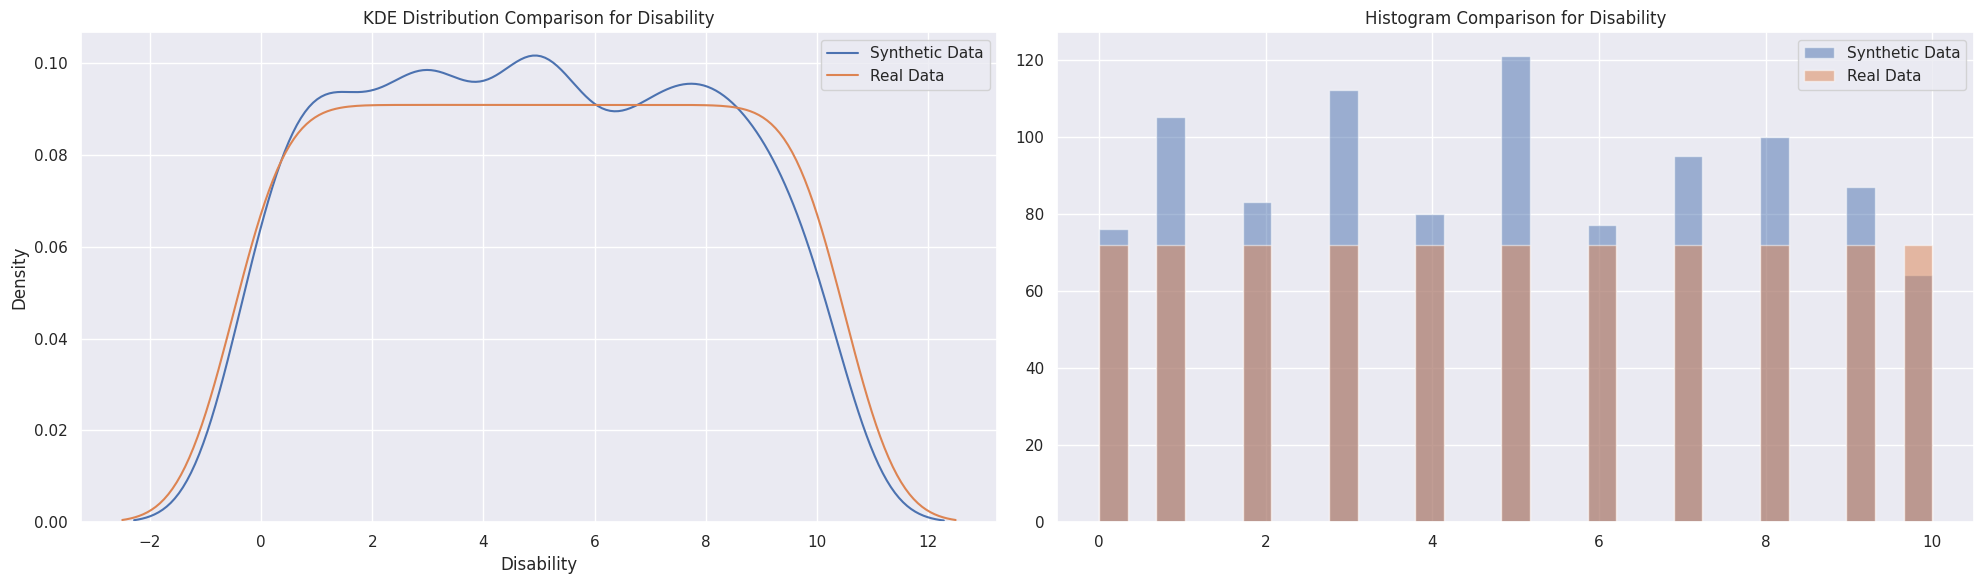

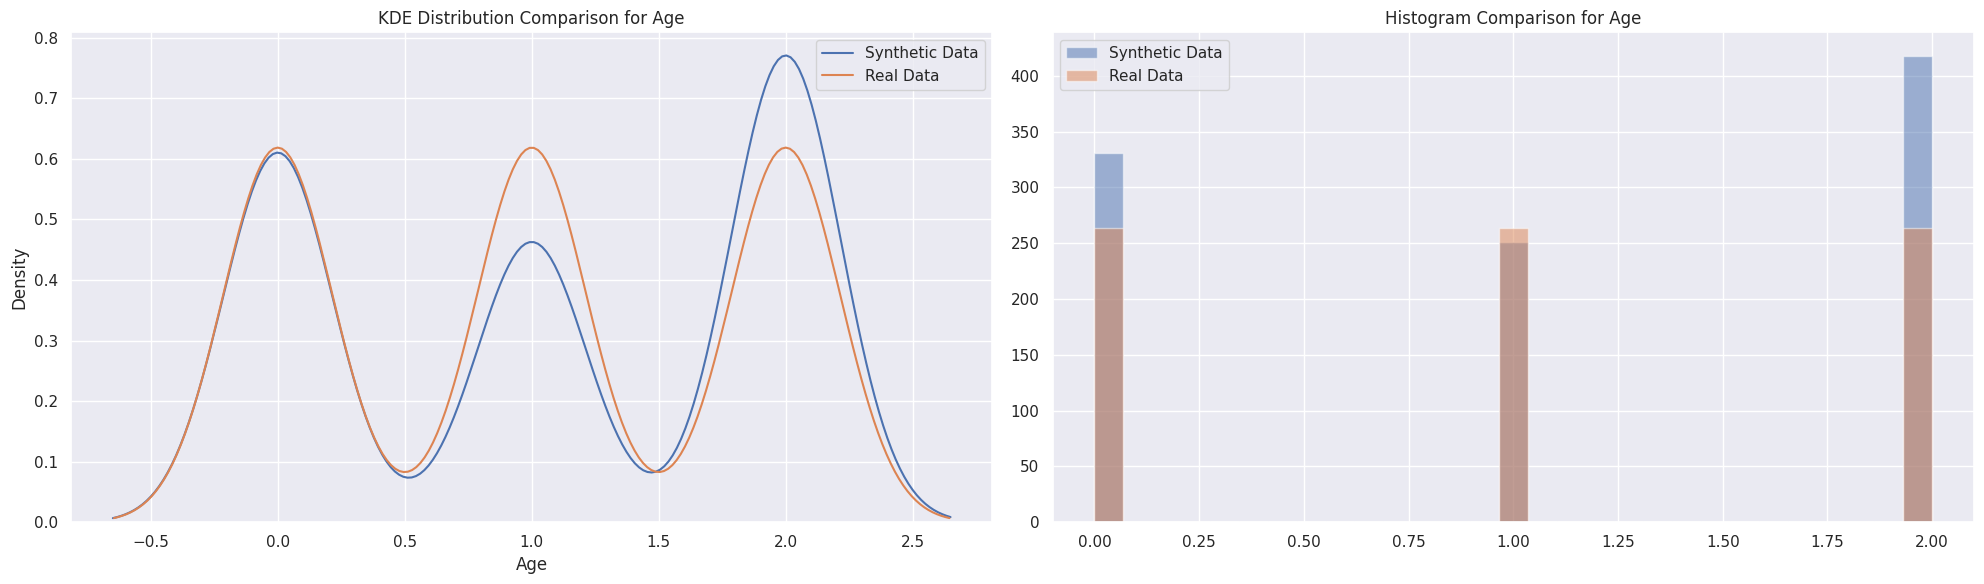

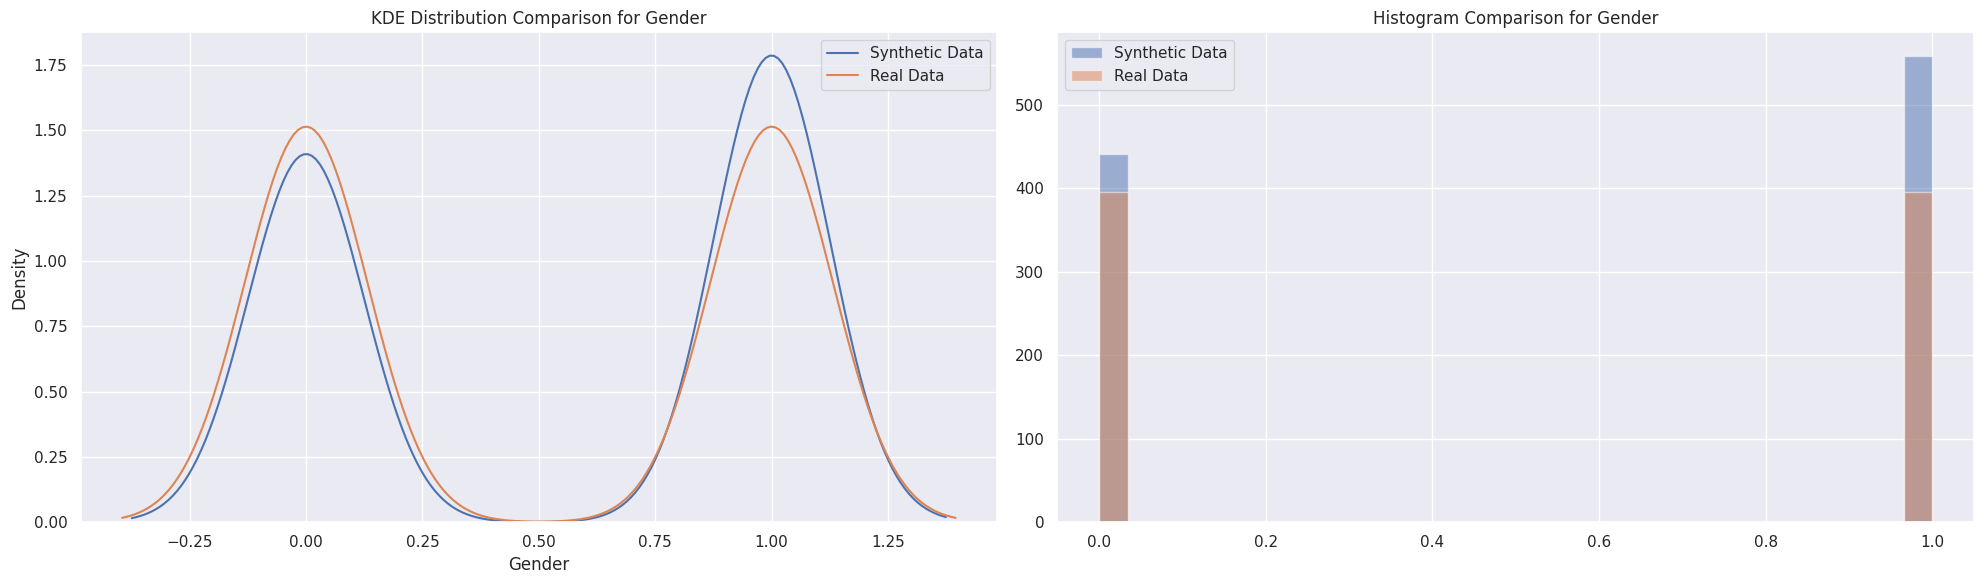

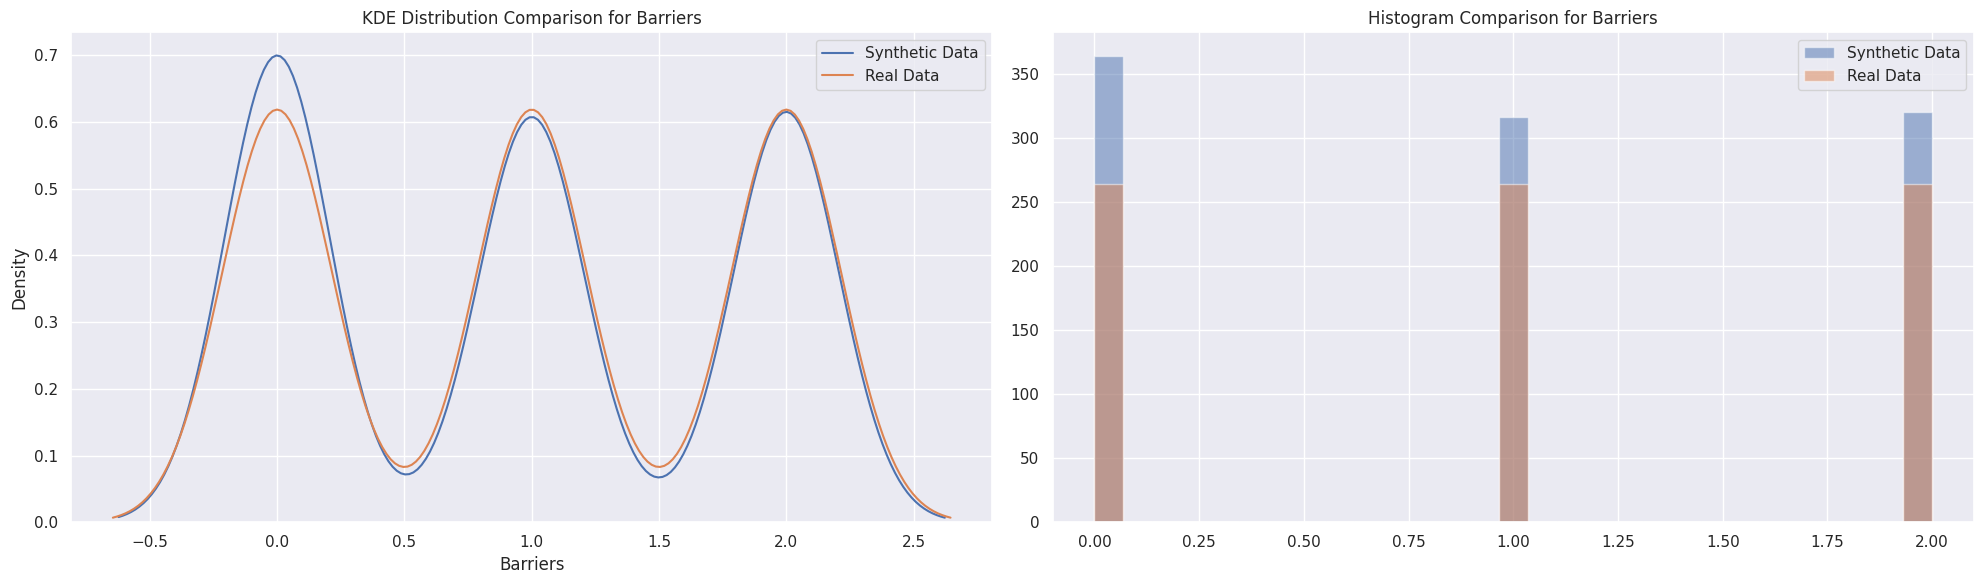

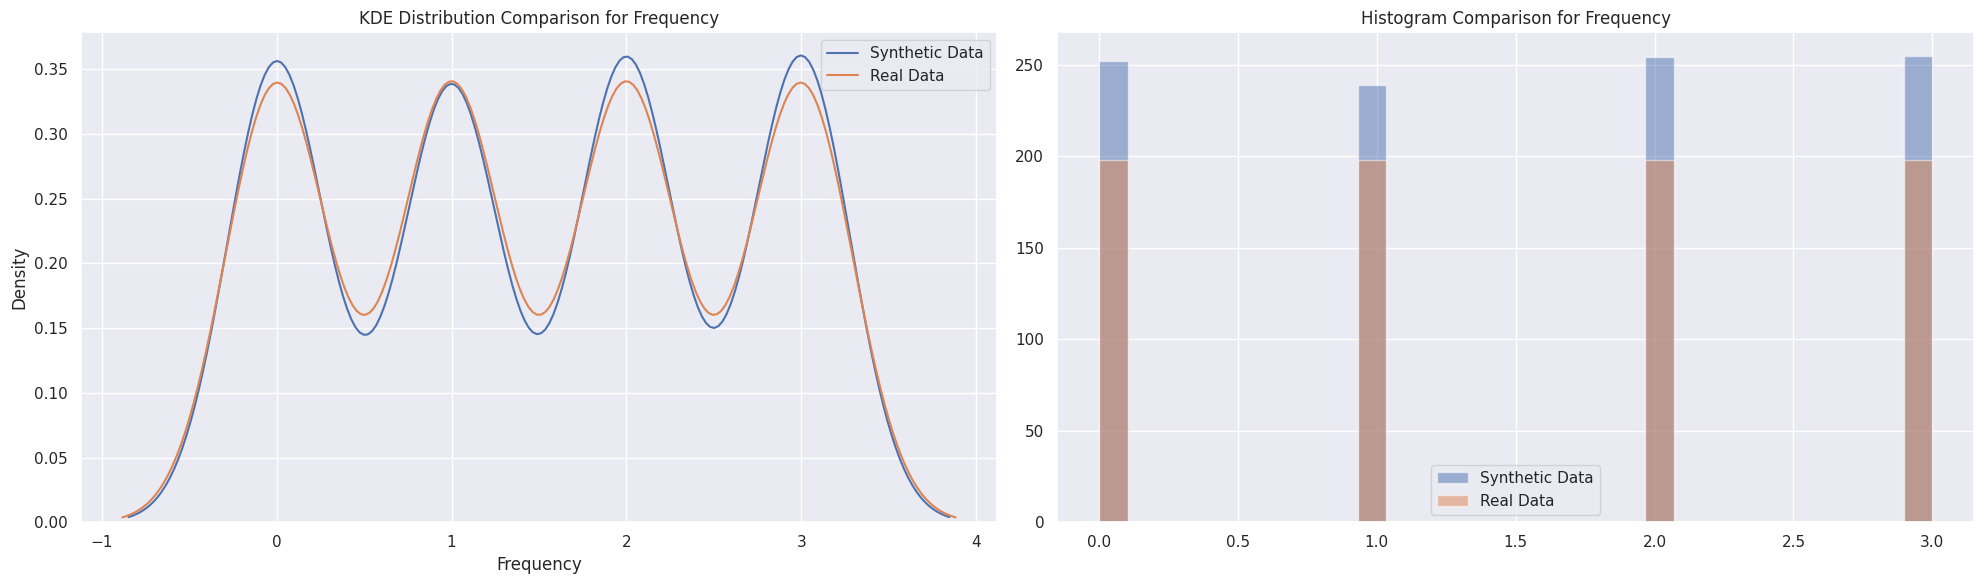

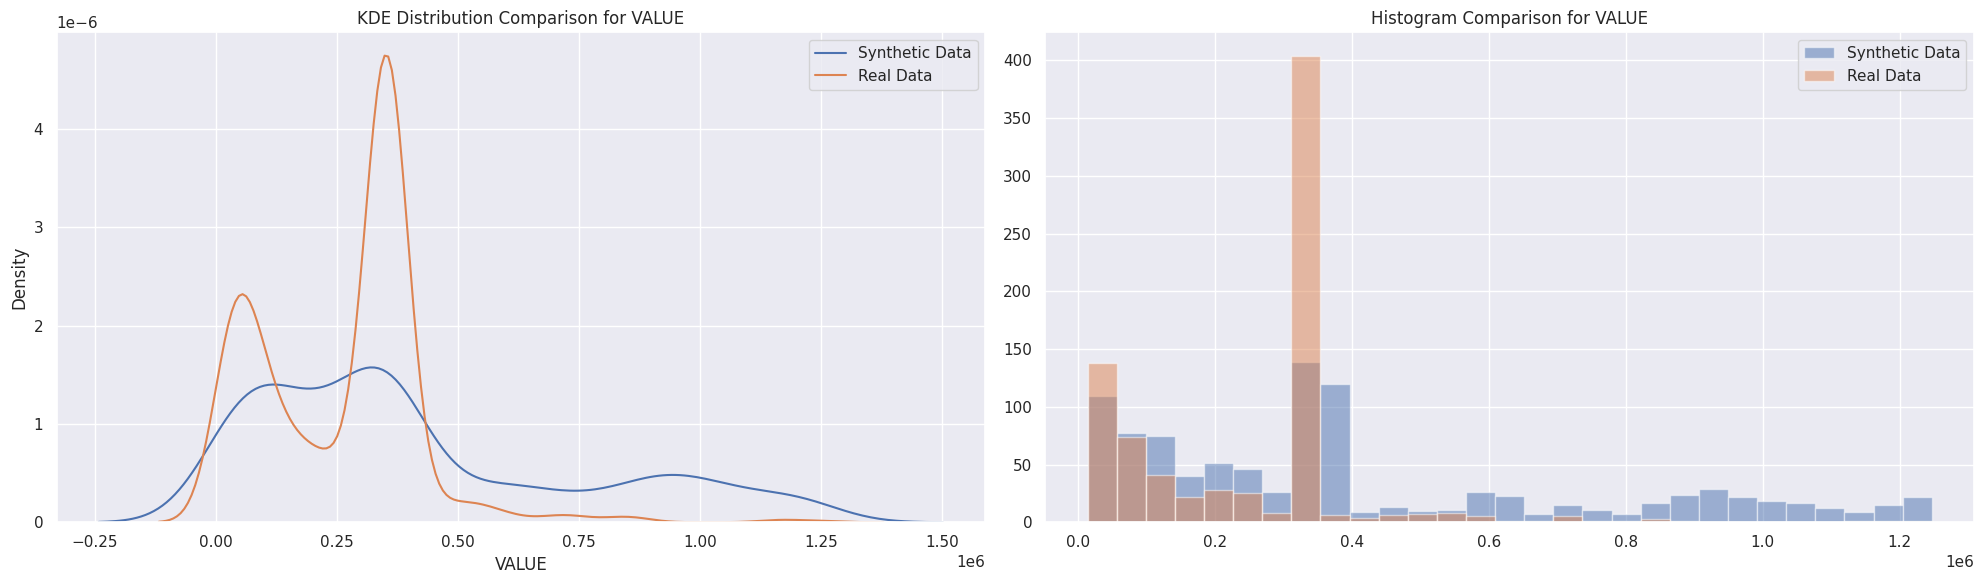

In [ ]:
for column in real_data.columns:
  if real_data[column].dtype in ['int64', 'float64']:
    synthetic_data_filtered = synthetic_df[column]
    real_data_filtered = real_data[column]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # KDE Plot
    sns.kdeplot(synthetic_data_filtered, label='Synthetic Data', ax=ax1)
    sns.kdeplot(real_data_filtered, label='Real Data', ax=ax1)
    ax1.set_title(f"KDE Distribution Comparison for {column}")
    ax1.legend()

    # Bar Plot
    bins = np.linspace(min(min(synthetic_data_filtered), min(real_data_filtered)),
                        max(max(synthetic_data_filtered), max(real_data_filtered)),
                        30)

    ax2.hist(synthetic_data_filtered, bins=bins, alpha=0.5, label='Synthetic Data')
    ax2.hist(real_data_filtered, bins=bins, alpha=0.5, label='Real Data')
    ax2.set_title(f"Histogram Comparison for {column}")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# DataSynthesizer Usage (independent attribute mode)

In [ ]:
mode = 'independent_attribute_mode'
description_file = f'./description_independent_attribute_mode.json'
synthetic_data = f'./sythetic_data_independent_attribute_mode.csv'
os.makedirs(os.path.dirname(description_file), exist_ok=True)
os.makedirs(os.path.dirname(synthetic_data), exist_ok=True)

In [ ]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_independent_attribute_mode(dataset_file=input_data,
                                                         attribute_to_is_categorical=categorical_attributes,
                                                         attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

In [ ]:
generator = DataGenerator()
generator.generate_dataset_in_independent_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
attribute_description = read_json_file(description_file)['attribute_description']
inspector = ModelInspector(input_df, synthetic_df, attribute_description)

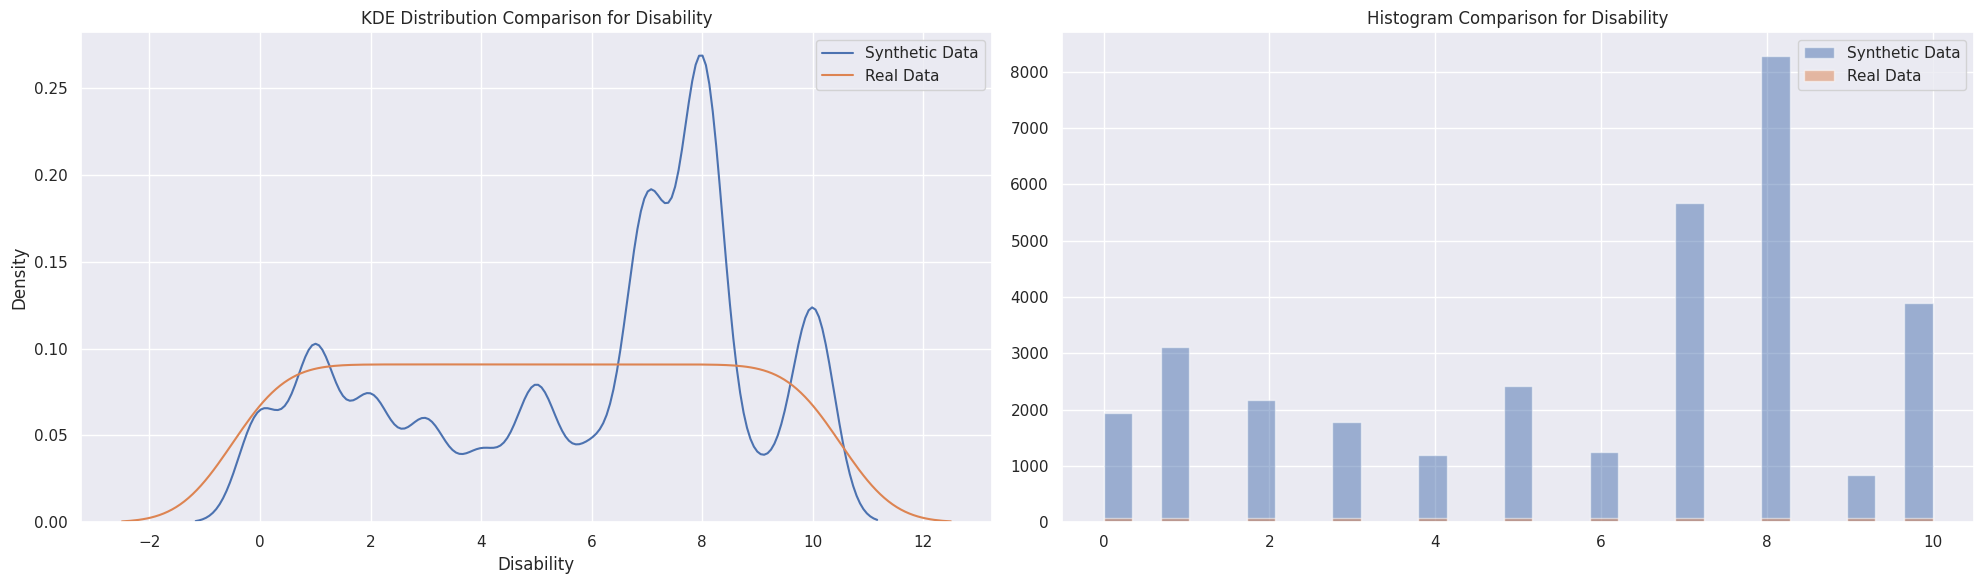

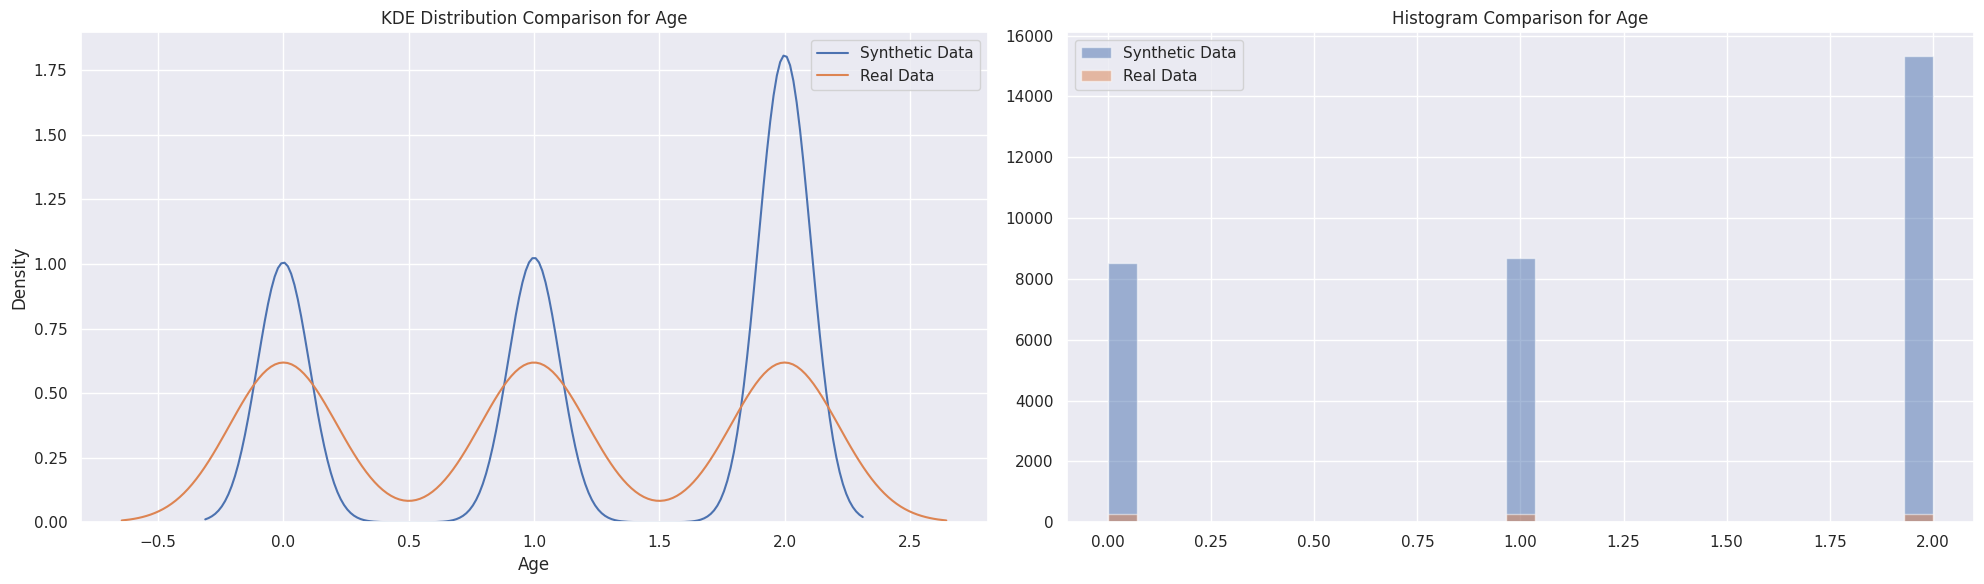

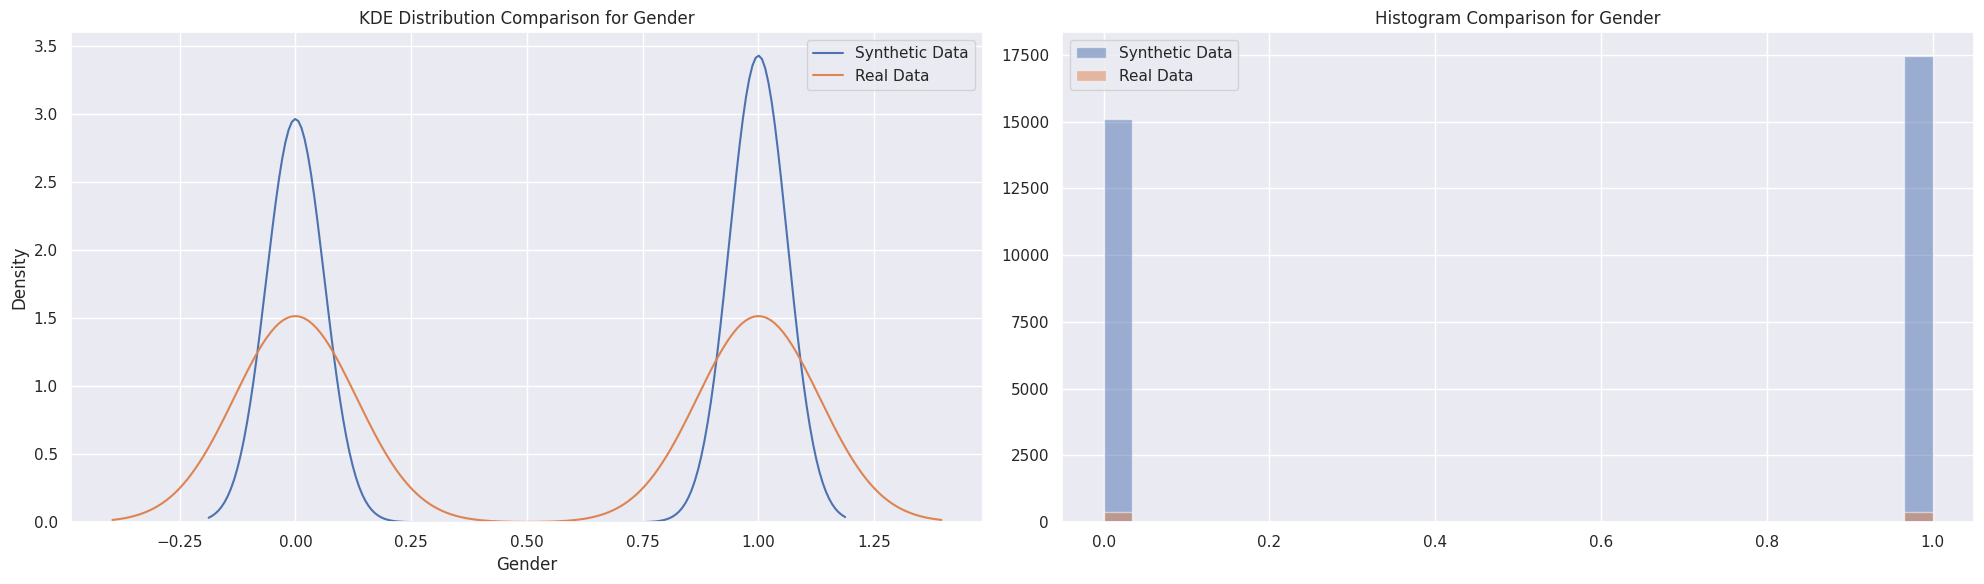

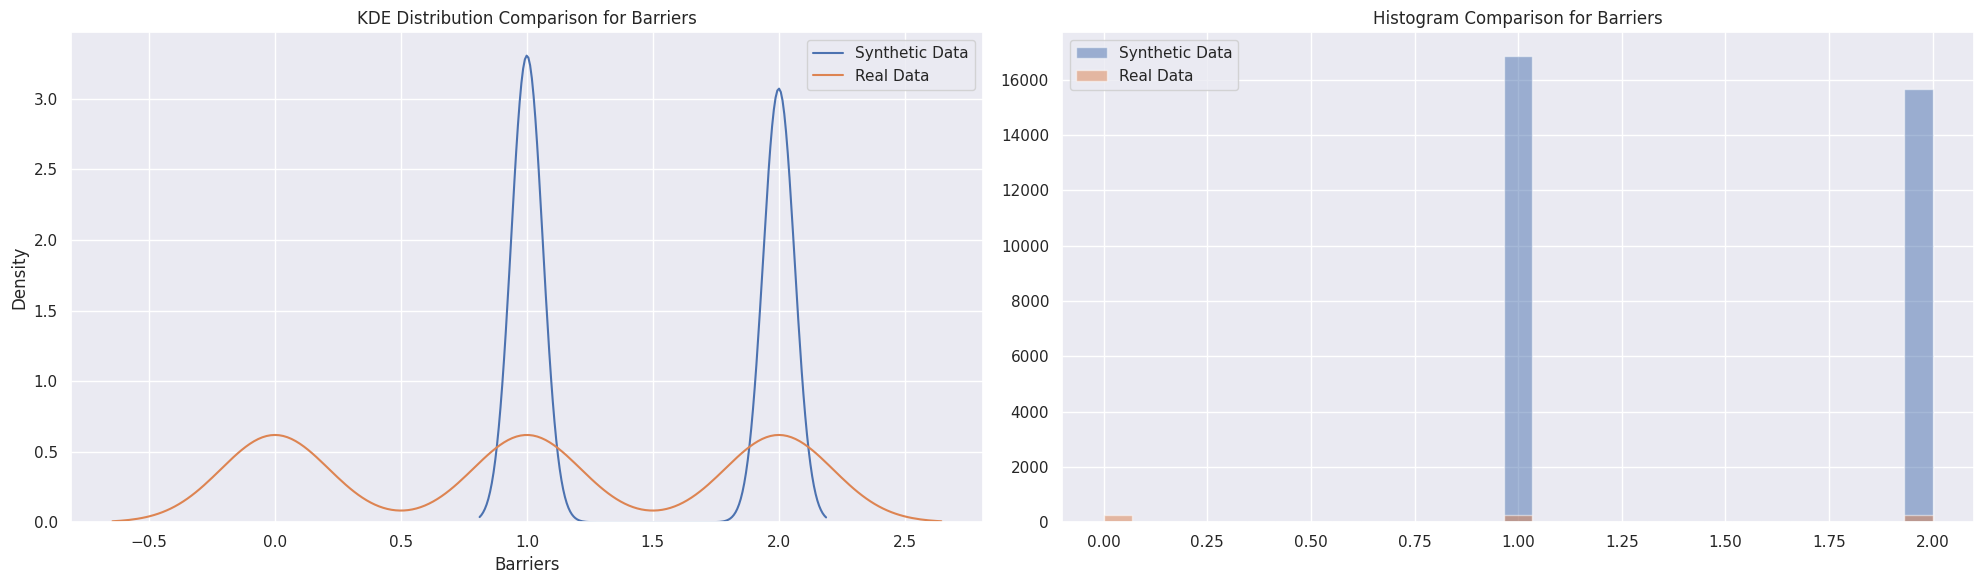

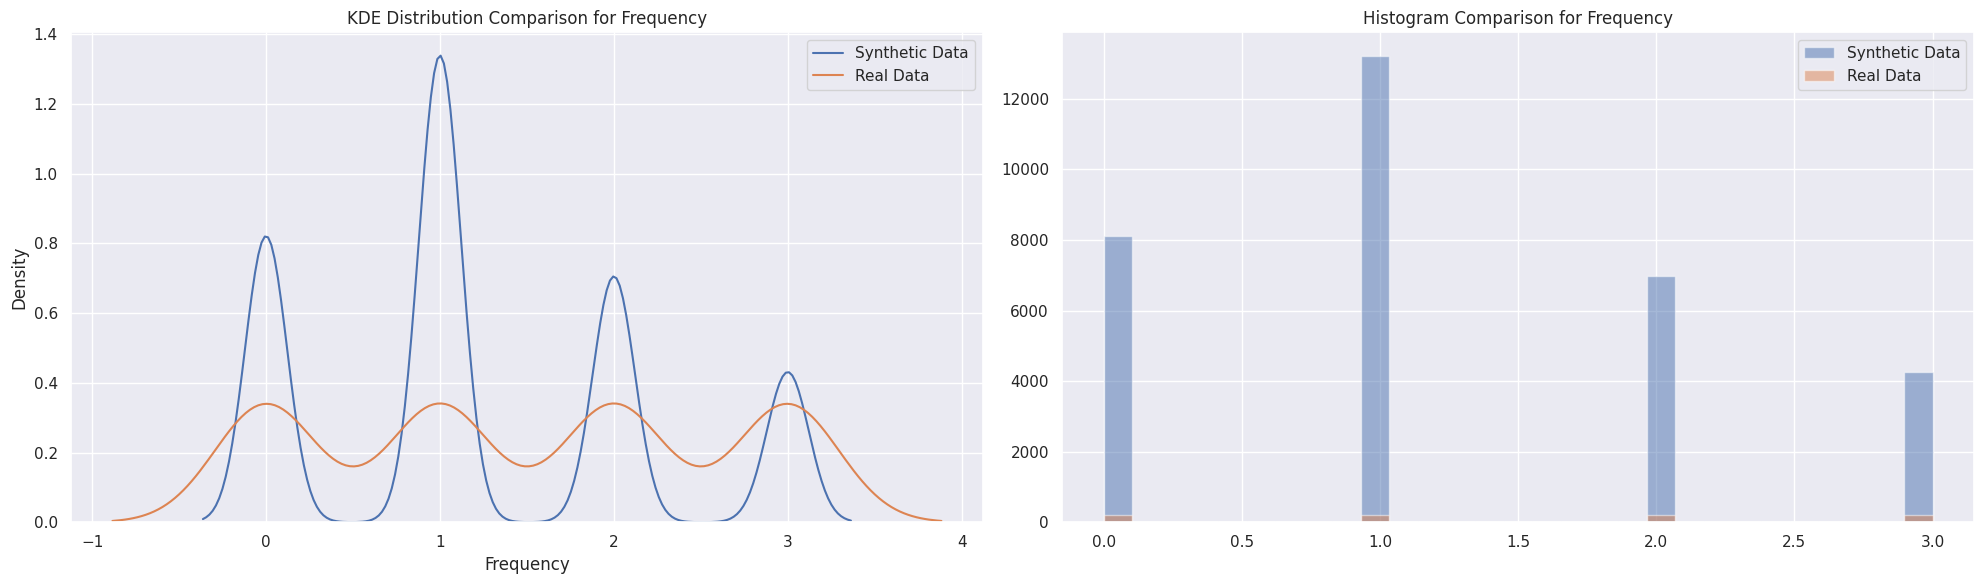

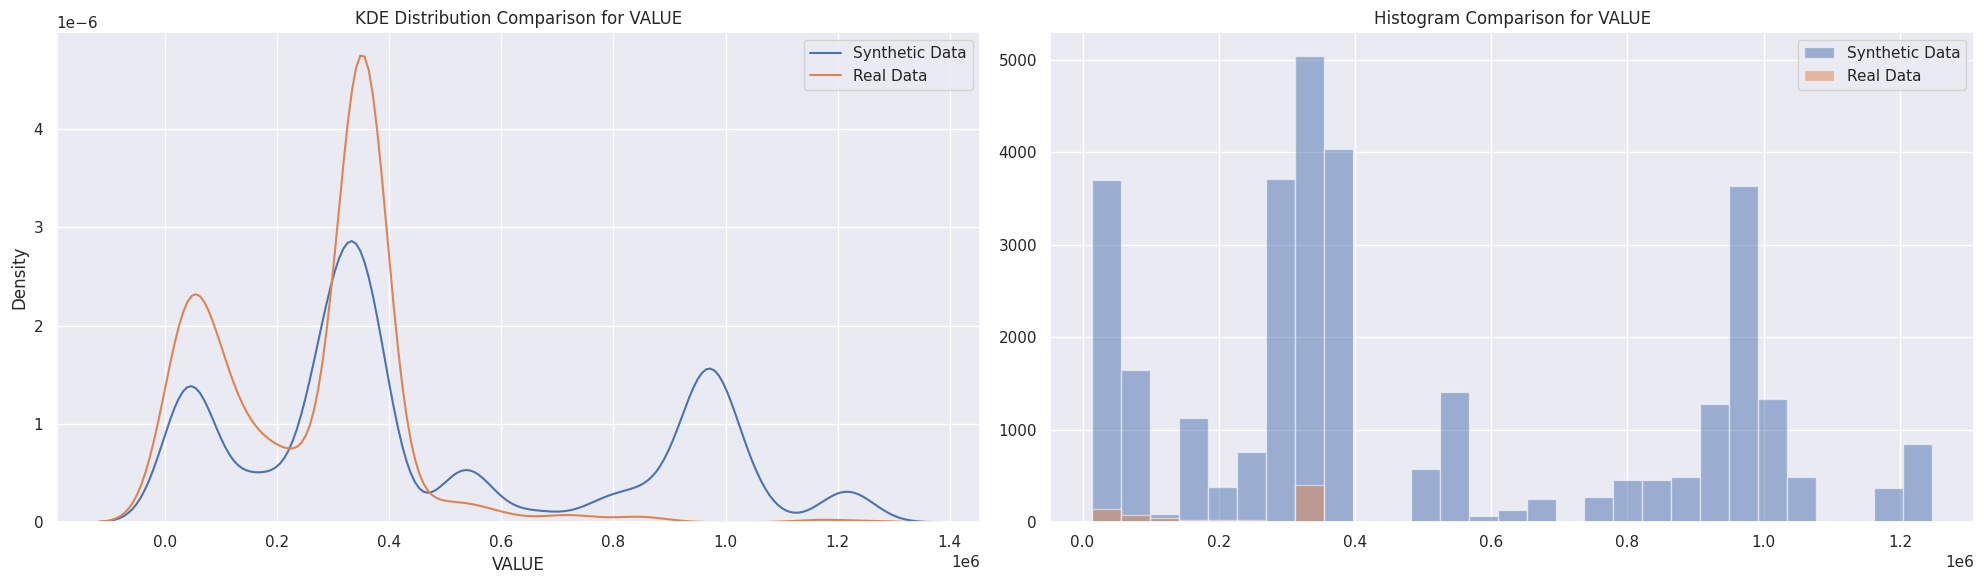

In [ ]:
for column in real_data.columns:
  if real_data[column].dtype in ['int64', 'float64']:
    synthetic_data_filtered = synthetic_df[column]
    real_data_filtered = real_data[column]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # KDE Plot
    sns.kdeplot(synthetic_data_filtered, label='Synthetic Data', ax=ax1)
    sns.kdeplot(real_data_filtered, label='Real Data', ax=ax1)
    ax1.set_title(f"KDE Distribution Comparison for {column}")
    ax1.legend()

    # Bar Plot
    bins = np.linspace(min(min(synthetic_data_filtered), min(real_data_filtered)),
                        max(max(synthetic_data_filtered), max(real_data_filtered)),
                        30)

    ax2.hist(synthetic_data_filtered, bins=bins, alpha=0.5, label='Synthetic Data')
    ax2.hist(real_data_filtered, bins=bins, alpha=0.5, label='Real Data')
    ax2.set_title(f"Histogram Comparison for {column}")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Evaluation

In [ ]:
real_data = pd.read_csv(file_name)
coupula = pd.read_csv('synthetic_data_coupula.csv')
CTGANS = pd.read_csv('synthetic_data_CTGANSynthesizer.csv')
correlated = pd.read_csv('sythetic_data_correlated_attribute_mode.csv')
independent = pd.read_csv('sythetic_data_independent_attribute_mode.csv')

results = []

In [ ]:
real_data.head()

,Disability,Age,Gender,Barriers,Frequency,VALUE
0,0,0,0,0,0,44910
1,0,0,0,0,1,26140
2,0,0,0,0,2,352247
3,0,0,0,0,3,352247
4,0,0,0,1,0,50670


In [ ]:
def kl_divergence(p, q):
    """Compute the KL divergence"""
    p = np.array(p)
    q = np.array(q)
    return np.sum(p * np.log(p / q))

# Function to compute KL Divergence for a categorical column
def compute_kl_divergence(column_name,synthetic_data):
    original_counts = real_data[column_name].value_counts(normalize=True)
    synthetic_counts = synthetic_data[column_name].value_counts(normalize=True)

    all_categories = set(original_counts.index) | set(synthetic_counts.index)

    original_probs = original_counts.reindex(all_categories, fill_value=0)
    synthetic_probs = synthetic_counts.reindex(all_categories, fill_value=0)
    original_probs += 1e-10
    synthetic_probs += 1e-10
    kl_div = kl_divergence(original_probs, synthetic_probs)

    return kl_div


def compare_categorical(column_original, column_synthetic, synthetic_data):
    """Perform Chi-Square Test"""
    contingency_table = pd.crosstab(real_data[column_original], synthetic_data[column_synthetic])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-value: {p_value}")
    return chi2_stat, p_value

In [ ]:
#coupula
for col in real_data.columns:
    chi2_stat, p_value = compare_categorical(col, col, coupula)
    kl = compute_kl_divergence(col, coupula)

    if chi2_stat == 0:
        decision = "Error"
    else:
      decision = "Same" if p_value > 0.05 else "Differet"

    results.append({
        "Mode": "coupula",
        "Column": col,
        "P-value": p_value,
        "Chi-Square": chi2_stat,
        "KL": kl,
        "Decision": decision
    })

#CTGANS
for col in real_data.columns:
    chi2_stat, p_value = compare_categorical(col, col, CTGANS)
    kl = compute_kl_divergence(col, CTGANS)

    if chi2_stat == 0:
        decision = "Error"
    else:
      decision = "Same" if p_value > 0.05 else "Differet"


    results.append({
        "Mode": "CTGANS",
        "Column": col,
        "P-value": p_value,
        "Chi-Square": chi2_stat,
        "KL": kl,
        "Decision": decision
    })

#correlated
for col in real_data.columns:
    chi2_stat, p_value = compare_categorical(col, col, correlated)
    kl = compute_kl_divergence(col, correlated)

    if chi2_stat == 0:
        decision = "Error"
    else:
      decision = "Same" if p_value > 0.05 else "Differet"

    results.append({
        "Mode": "correlated",
        "Column": col,
        "P-value": p_value,
        "Chi-Square": chi2_stat,
        "KL": kl,
        "Decision": decision
    })

#independent
for col in real_data.columns:
    chi2_stat, p_value = compare_categorical(col, col, independent)
    kl = compute_kl_divergence(col, independent)

    if chi2_stat == 0:
        decision = "Error"
    else:
      decision = "Same" if p_value > 0.05 else "Differet"

    results.append({
        "Mode": "independent",
        "Column": col,
        "P-value": p_value,
        "Chi-Square": chi2_stat,
        "KL": kl,
        "Decision": decision
    })

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Mode,Column,P-value,Chi-Square,KL,Decision
0,coupula,Disability,0.268587,66.306669,0.004919,Same
1,coupula,Age,0.021585,11.488931,0.001584,Differet
2,coupula,Gender,0.728084,0.120878,0.001803,Same
3,coupula,Barriers,0.103715,7.687619,0.001088,Same
4,coupula,Frequency,0.365454,9.817581,0.000284,Same
5,coupula,VALUE,0.302502,133000.000000,19.394863,Same
6,CTGANS,Disability,0.337763,64.007605,0.009305,Same
7,CTGANS,Age,0.116841,7.386025,0.003291,Same
8,CTGANS,Gender,0.316623,1.002847,0.003210,Same
9,CTGANS,Barriers,0.454656,3.655331,0.000618,Same


In [ ]:

kl_avg_by_mode = results_df.groupby('Mode')['KL'].mean()
print(kl_avg_by_mode)


Mode
CTGANS         3.227498
correlated     3.230190
coupula        3.234090
independent    4.412787
Name: KL, dtype: float64


In [ ]:
kl_avg_by_mode = results_df.groupby('Mode')['Chi-Square'].mean()
print(kl_avg_by_mode)

In [ ]:
results_df.to_csv('results.csv', index=False)